In [504]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [505]:
class Q_table:
    
    def __init__(self, environment, actions, epsilon, discount_rate, learning_rate):
        self.rewards = environment
        self.environment_rows = len(environment)
        self.environment_columns = len(environment[0])
        self.actions = actions
        self.q_values = np.zeros((len(environment), len(environment[0]), len(actions)))
        self.epsilon = epsilon
        self.discount_rate = discount_rate
        self.learning_rate = learning_rate

    def set_epsilon(self, epsilon):
        self.epsilon = epsilon
        print("now epsilon = " + epsilon)

    def set_discount_rate(self, discount_rate):
        self.discount_rate = discount_rate
        print("now discount_rate = " + discount_rate)

    def set_learning_rate(self, learning_rate):
        self.learning_rate = learning_rate
        print("now learning_rate = " + learning_rate)

    #確認是否為結算點(非結算點 rewards 還沒想到要怎麼定義)
    def check_terminal_state(self, current_row_index, current_column_index):
        if self.rewards[current_row_index, current_column_index] == -1:
            return False
        else:
            return True
    
    def get_next_action(self, current_row_index, current_column_index, epsilon):

        #根據 epsilon 決定是否做分數最高的動作
        if np.random.uniform(0, 1) < epsilon :
            return np.argmax(self.q_values[current_row_index, current_column_index])
        else:
            return np.random.randint(0, 4)

    #取得下一個狀態
    def get_next_state(self, current_row_index, current_column_index, actionsIndex):
        new_row_index = current_row_index
        new_column_index = current_column_index

        #判斷動作及是否超出邊界
        if self.actions[actionsIndex] == 'up' and current_row_index > 0:
            new_row_index -= 1
        elif self.actions[actionsIndex] == 'right' and current_column_index < self.environment_columns-1:
            new_column_index += 1
        elif self.actions[actionsIndex] == 'down' and current_row_index < self.environment_rows-1:
            new_row_index += 1
        elif self.actions[actionsIndex] == 'left' and current_column_index > 0:
            new_column_index -= 1

        return new_row_index, new_column_index

    #取得初始狀態
    def get_start_state(self):
        start_row_index = np.random.randint(self.environment_rows)
        start_column_index = np.random.randint(self.environment_columns)
        
        #確保初始狀態不是結算點
        while self.check_terminal_state(start_row_index, start_column_index):
            start_row_index = np.random.randint(self.environment_rows)
            start_column_index = np.random.randint(self.environment_columns)

        return start_row_index, start_column_index

    #取得根據 q_values 得出的最短路徑
    def get_shortest_path(self, start_row_index, start_column_index):
        
        if self.check_terminal_state(start_row_index, start_column_index):
            print(start_row_index, start_row_index, "is terminal state")
            return []
        
        row_index = start_row_index
        column_index = start_column_index
        shortest_path = []
        shortest_path.append([row_index, column_index])

        while not self.check_terminal_state(row_index, column_index):
            action = self.get_next_action(row_index, column_index, 1)
            row_index, column_index = self.get_next_state(row_index, column_index, action)
            shortest_path.append([row_index, column_index])

        return shortest_path
    
    def start_training(self, time):
        for episode in range(time):
  
            row_index, column_index = self.get_start_state()

            while not self.check_terminal_state(row_index, column_index):
                
                action_index = self.get_next_action(row_index, column_index, self.epsilon)

                old_row_index, old_column_index = row_index, column_index
                row_index, column_index = self.get_next_state(row_index, column_index, action_index)
                
                reward = self.rewards[row_index, column_index]
                old_q_value = self.q_values[old_row_index, old_column_index, action_index]


                temporal_difference = reward + (self.discount_rate * np.max(self.q_values[row_index, column_index])) - old_q_value

                new_q_value = old_q_value + (self.learning_rate * temporal_difference)
                self.q_values[old_row_index, old_column_index, action_index] = new_q_value

        print('Training complete!')

    #顯示 q_values
    def show_q_values(self):
        
        #將 q_values 整理成二維陣列
        actions_values = []
        for i in range(11):
            for j in range(11):
                actions_values.append(self.q_values[i][j])

        #塞資料進表格
        df = pd.DataFrame(actions_values)

        #生成表格的 index
        row_column_index = []
        for i in range(11):
            for j in range(11):
                row_column_index.append("state (" + str(i) + " , " + str(j) + ")")

        #塞 index, columns 進表格
        df.index = row_column_index
        df.columns = self.actions

        #設定表格並顯示
        plt.figure('123')            
        ax = plt.axes(frame_on=False)
        ax.xaxis.set_visible(False)  
        ax.yaxis.set_visible(False)  
        pd.plotting.table(ax, df, loc='center') 
        plt.show()

    #顯示 rewards
    def show_rewards(self):
        sns.heatmap(self.rewards,vmax=100,vmin= -100, cmap = "RdBu_r",fmt= "g", linewidths= 0.3 , annot= True)
        plt.plot() 
        plt.show()

    #顯示最短路徑
    def show_path(self, path):
        path_table = np.copy(self.rewards)

        for i in range(len(path)):
            
            path_table[path[i][0]][path[i][1]] = 50

            if i == len(path)-1:
                path_table[path[i][0]][path[i][1]] = 100
        
        sns.heatmap(path_table,vmax=100,vmin= -100,cmap = "RdBu_r",linewidths= 0.3)
        plt.plot()
        plt.show()


In [506]:
actions = ['up', 'right', 'down', 'left']

rewards = np.full((11, 11), -100.)
rewards[0, 5] = 100. 

aisles = {}
aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 7, 9]
aisles[3] = [i for i in range(1, 8)]
aisles[3].append(9)
aisles[4] = [3, 7]
aisles[5] = [i for i in range(11)]
aisles[6] = [5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(11)]

for row_index in range(1, 10):
  for column_index in aisles[row_index]:
    rewards[row_index, column_index] = -1.

![warehouse map](https://www.danielsoper.com/teaching/img/08-warehouse-map.png) ![warehouse map](https://www.danielsoper.com/teaching/img/08-warehouse-map-rewards.png)

In [507]:
table = Q_table(rewards, actions, 0.9, 0.9, 0.9)
table.start_training(1000)

Training complete!


shortest_path：
start = 1 3
[[1, 3], [1, 4], [1, 5], [0, 5]]


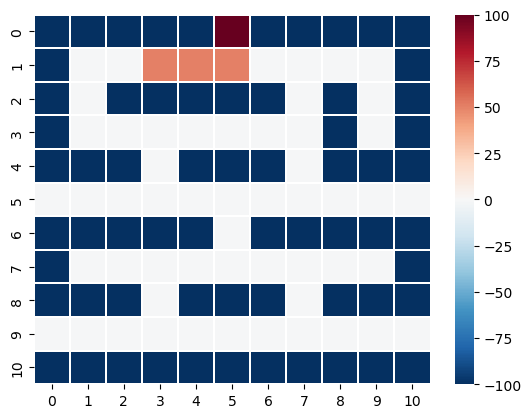

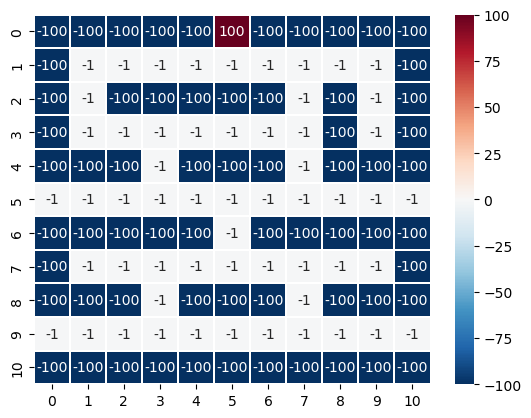

In [509]:
row, column = table.get_start_state()
print("shortest_path：")
print("start =", row, column)
path = table.get_shortest_path(row, column)
print(path)
table.show_path(path)
table.show_rewards()